# SAM Example

In [7]:
import cv2
import torch, time, cv2
import torchvision
import matplotlib.pyplot as plt
import numpy as np
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.6.0+cu124
Torchvision version: 0.21.0+cu124
CUDA is available: True


In [8]:
image = cv2.imread('test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

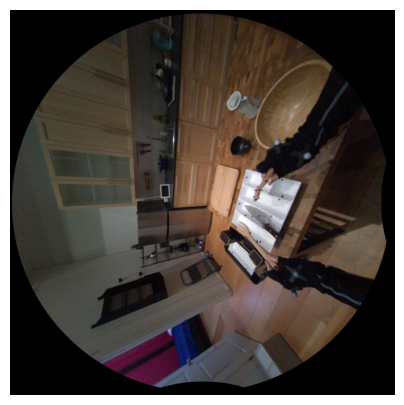

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "/home/jackd/source/egolifter/checkpoints/sam_vit_h_4b8939.pth"
model_type = "vit_h"

# sam_checkpoint = "/home/jackd/source/egolifter/checkpoints/sam_vit_b_01ec64.pth"
# model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
masks = mask_generator.generate(image)

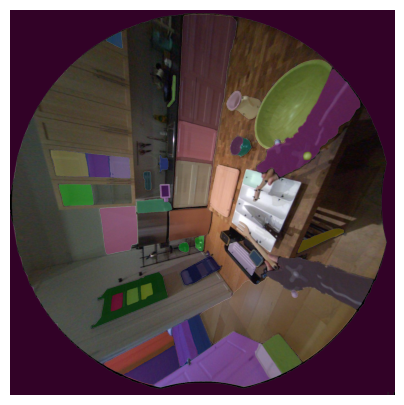

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [ ]:
# Resume the model from the GPU
# sam.cpu()
# del sam
# torch.cuda.empty_cache()

In [ ]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import cv2
import torch, time, cv2
sam = sam_model_registry["vit_b"](checkpoint="/home/jackd/source/egolifter/checkpoints/sam_vit_b_01ec64.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
img = cv2.imread("test.jpg")[:,:,::-1]
masks = mask_generator.generate(img)

In [ ]:
img = cv2.imread("test.jpg")[:,:,::-1]
masks = mask_generator.generate(img)

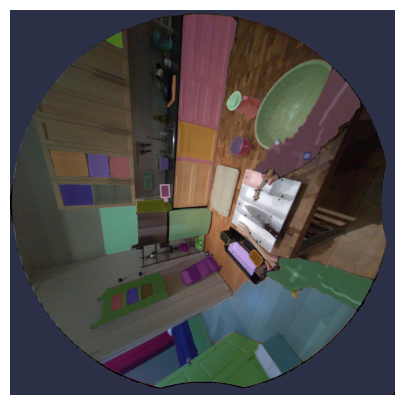

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(img)
show_anns(masks)
plt.axis('off')
plt.show()